In [1]:
library("dplyr")
library(tidyverse)
library(readxl)
library(plm)
library(dlm)
library(ggplot2)
library(zoo)
library(lattice)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.0.0     v forcats 0.4.0
v readr   1.3.1     
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'read

In [2]:
df1 <- read_csv("SLB.csv")
glimpse(df1)
head(df1)
tail(df1)

Parsed with column specification:
cols(
  Date = col_character(),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)


Observations: 8,569
Variables: 7
$ Date        <chr> "12/31/1985", "1/2/1986", "1/3/1986", "1/6/1986", "1/7/...
$ Open        <dbl> 9.12500, 9.15625, 9.00000, 9.06250, 9.18750, 9.40625, 9...
$ High        <dbl> 9.25000, 9.18750, 9.09375, 9.21875, 9.43750, 9.43750, 9...
$ Low         <dbl> 9.06250, 8.90625, 8.96875, 9.03125, 9.18750, 9.15625, 8...
$ Close       <dbl> 9.12500, 9.00000, 9.06250, 9.15625, 9.40625, 9.25000, 9...
$ `Adj Close` <dbl> 1.371067, 1.352285, 1.361677, 1.375763, 1.413326, 1.389...
$ Volume      <dbl> 3067600, 1694000, 1395200, 2134000, 3030400, 4520000, 3...


Date,Open,High,Low,Close,Adj Close,Volume
12/31/1985,9.12500,9.25000,9.06250,9.12500,1.371067,3067600
1/2/1986,9.15625,9.18750,8.90625,9.00000,1.352285,1694000
1/3/1986,9.00000,9.09375,8.96875,9.06250,1.361677,1395200
1/6/1986,9.06250,9.21875,9.03125,9.15625,1.375763,2134000
1/7/1986,9.18750,9.43750,9.18750,9.40625,1.413326,3030400
1/8/1986,9.40625,9.43750,9.15625,9.25000,1.389849,4520000


Date,Open,High,Low,Close,Adj Close,Volume
12/19/2019,39.59,39.83,39.48,39.61,39.61,7048600
12/20/2019,39.93,39.97,39.18,39.43,39.43,13465800
12/23/2019,39.44,40.89,39.43,40.79,40.79,9911300
12/24/2019,40.74,40.93,40.35,40.65,40.65,3860400
12/26/2019,40.86,40.88,39.93,40.07,40.07,7629700
12/27/2019,40.13,40.38,39.83,40.00,40.00,6769100


In [3]:
str(df1)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	8569 obs. of  7 variables:
 $ Date     : chr  "12/31/1985" "1/2/1986" "1/3/1986" "1/6/1986" ...
 $ Open     : num  9.12 9.16 9 9.06 9.19 ...
 $ High     : num  9.25 9.19 9.09 9.22 9.44 ...
 $ Low      : num  9.06 8.91 8.97 9.03 9.19 ...
 $ Close    : num  9.12 9 9.06 9.16 9.41 ...
 $ Adj Close: num  1.37 1.35 1.36 1.38 1.41 ...
 $ Volume   : num  3067600 1694000 1395200 2134000 3030400 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   `Adj Close` = col_double(),
  ..   Volume = col_double()
  .. )


In [4]:
colSums(is.na(df1)) # checking missing values

Date      Open      High       Low     Close Adj Close    Volume 
        0         0         0         0         0         0         0

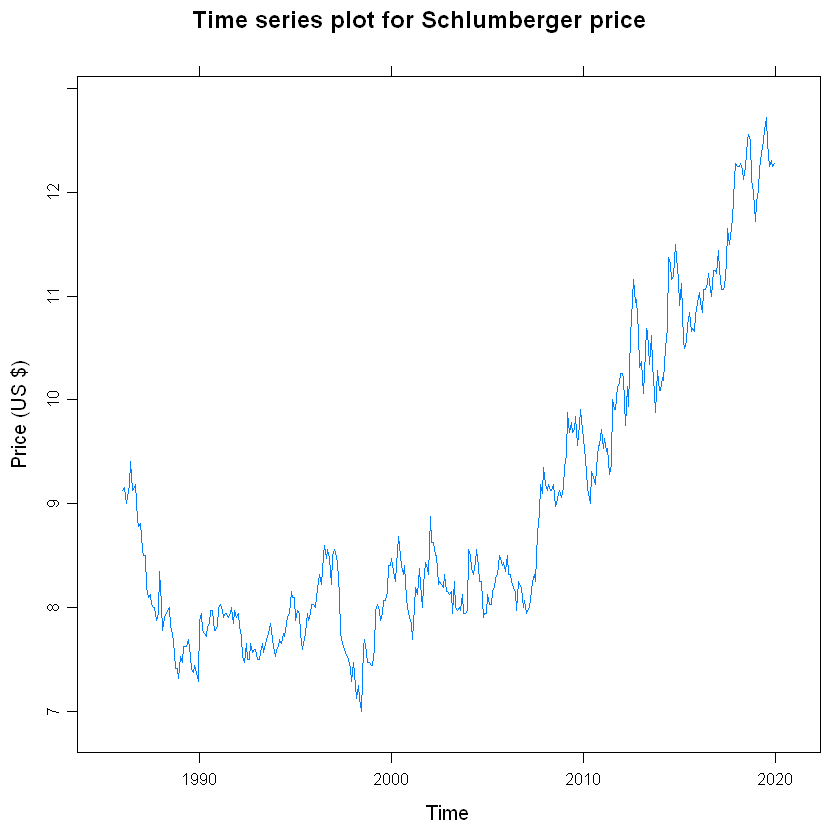

In [5]:
df1 = ts(df1$Open, start= c(1986,1), end = c(2019,12), frequency = 12)
xyplot(df1, ylab = "Price (US $)", main = "Time series plot for Schlumberger price")

### Autocorrelation Function (ACF)
#### Identify if correlation at different time lags goes to 0
The stationary = Guassian noise and one with a trend = cummulative sum of Gaussian noise We will check each for characteristics of stationarity by looking at the autocorrelation functions of each signal. We would expect the ACF to go to 0 for each time lag (τ) for a stationary signal, because we expect no dependence with time.

In [6]:
library(pastecs)

Warning message:
"package 'pastecs' was built under R version 3.6.2"
Attaching package: 'pastecs'

The following object is masked from 'package:tidyr':

    extract

The following objects are masked from 'package:dplyr':

    first, last



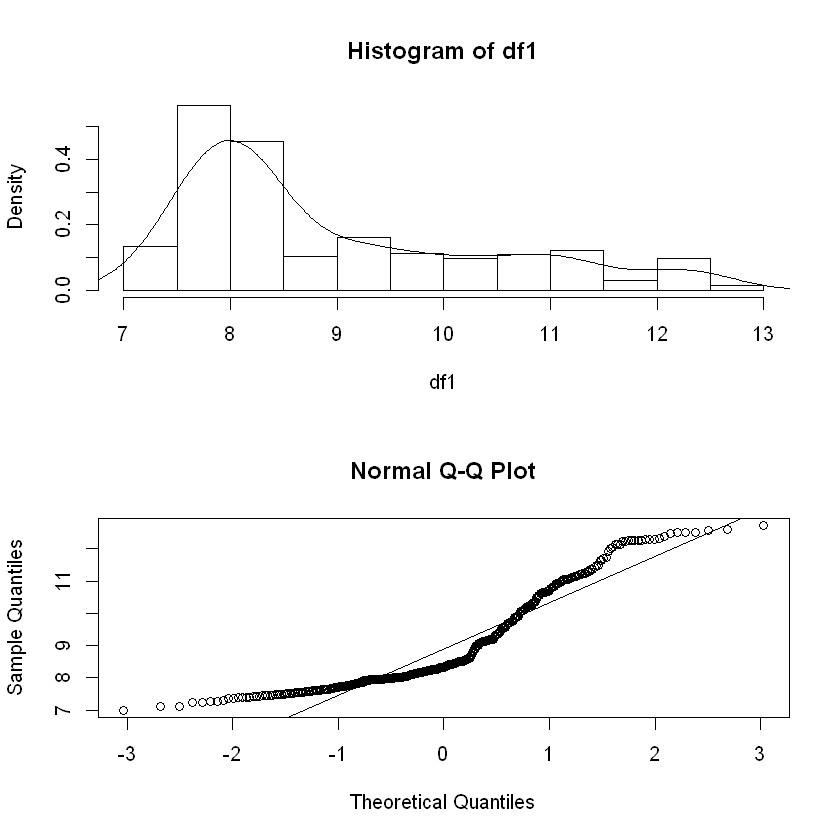

In [7]:
par(mfrow=c(2,1))        # set up the graphics 
hist(df1, prob=TRUE, 12)   # histogram    
lines(density(df1))     # density for details 
qqnorm(df1)             # normal Q-Q plot  
qqline(df1)

In [8]:
stat.desc(df1, basic=TRUE, norm=TRUE, p=0.95)

,x
nbr.val,4.080000e+02
nbr.null,0.000000e+00
nbr.na,0.000000e+00
min,7.000000e+00
max,1.271875e+01
range,5.718750e+00
sum,3.653438e+03
median,8.312500e+00
mean,8.954504e+00
SE.mean,7.068832e-02


### startionaity test

In [9]:
library(tseries)
library(lubridate)
library(aTSA)

Warning message:
"package 'tseries' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'aTSA'

The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test

The following object is masked from 'package:pastecs':

    trend.test

The following object is masked from 'package:graphics':

    identify



In [10]:
stationary.test(df1, method = "adf")
stationary.test(df1, method = "pp") # same as pp.test(x)
stationary.test(df1, method = "kpss")

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 0.843   0.887
[2,]   1 0.886   0.899
[3,]   2 0.937   0.906
[4,]   3 0.924   0.904
[5,]   4 0.864   0.893
[6,]   5 1.024   0.917
Type 2: with drift no trend 
     lag     ADF p.value
[1,]   0 -0.1706   0.936
[2,]   1 -0.0728   0.950
[3,]   2 -0.0496   0.952
[4,]   3 -0.0435   0.952
[5,]   4 -0.0883   0.947
[6,]   5  0.3066   0.978
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.84   0.224
[2,]   1 -2.83   0.228
[3,]   2 -2.72   0.272
[4,]   3 -2.79   0.242
[5,]   4 -2.96   0.172
[6,]   5 -2.96   0.173
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   5 0.343   0.768
----- 
 Type 2: with drift no trend 
 lag   Z_rho p.value
   5 -0.0692   0.953
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   5 -11.6   0.386
--------------- 
Note:

### normalization

In [13]:
df1_stationary <- rnorm(length(df1), mean=1, sd=1) # the stationary time series using mean & std
df1_trend <- cumsum(rnorm(length(df1), mean=1, sd=4)) + df1/100 # time series with a trend

# normalize each trend & starionary
df1_stationary <- df1_stationary / max(df1_stationary) 
df1_trend <- df1_trend / max(df1_trend)

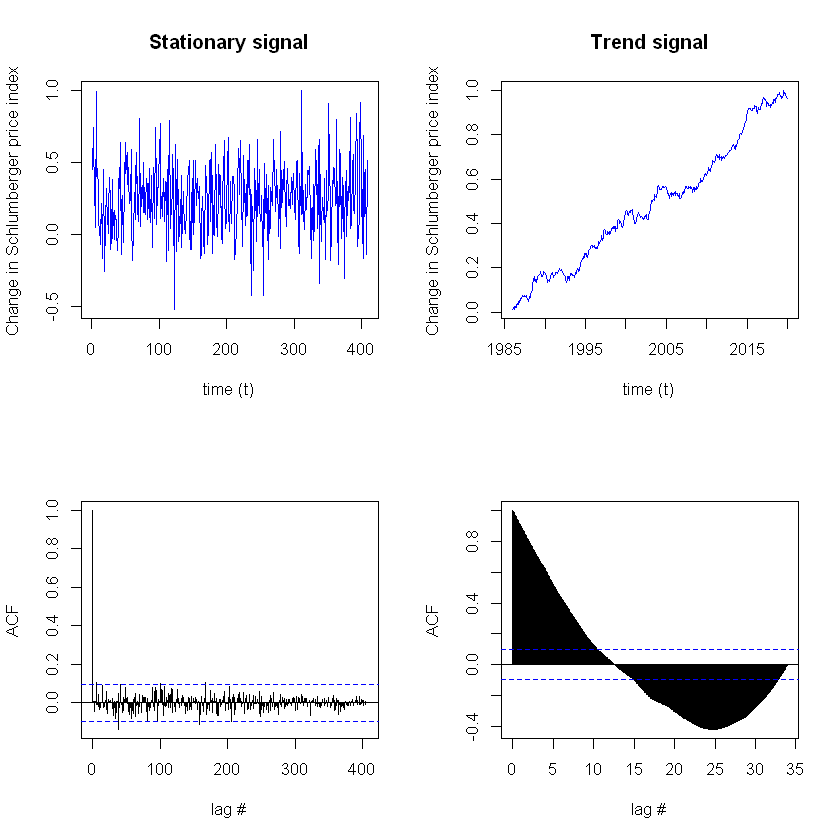

In [14]:
plot.new()
frame()
par(mfcol=c(2,2))

# the stationary signal and ACF
plot(df1_stationary,
     type='l', col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "Stationary signal")
acf(df1_stationary, lag.max = length(df1_stationary),
         xlab = "lag #", ylab = 'ACF',main=' ')

# the trend signal and ACF
plot(df1_trend,
     type='l',col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "Trend signal")
acf(df1_trend, lag.max = length(df1_trend),
         xlab = "lag #", ylab = 'ACF', main=' ')


In [19]:
stationary.test(df1_stationary, method = "adf")
stationary.test(df1_stationary, method = "pp") # same as pp.test(x)
stationary.test(df1_stationary, method = "kpss")

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -11.59    0.01
[2,]   1  -7.23    0.01
[3,]   2  -5.44    0.01
[4,]   3  -4.26    0.01
[5,]   4  -3.44    0.01
[6,]   5  -2.89    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -19.98    0.01
[2,]   1 -14.20    0.01
[3,]   2 -12.07    0.01
[4,]   3 -10.33    0.01
[5,]   4  -9.16    0.01
[6,]   5  -7.76    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -20.08    0.01
[2,]   1 -14.36    0.01
[3,]   2 -12.25    0.01
[4,]   3 -10.55    0.01
[5,]   4  -9.39    0.01
[6,]   5  -8.07    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   5  -239    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   5  -395    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   5  -392    0.01
--------------- 
No

### Decomposing Time Series
Decomposing a time series means separating it into it’s constituent components, which are often a trend component and a random component, and if the data is seasonal, a seasonal component. Decomposing the time series involves tying to separate the time series into these individual components.

Let's use simple moving average smoothing method of the time series to estimate the trend component.

In [16]:
library("TTR")

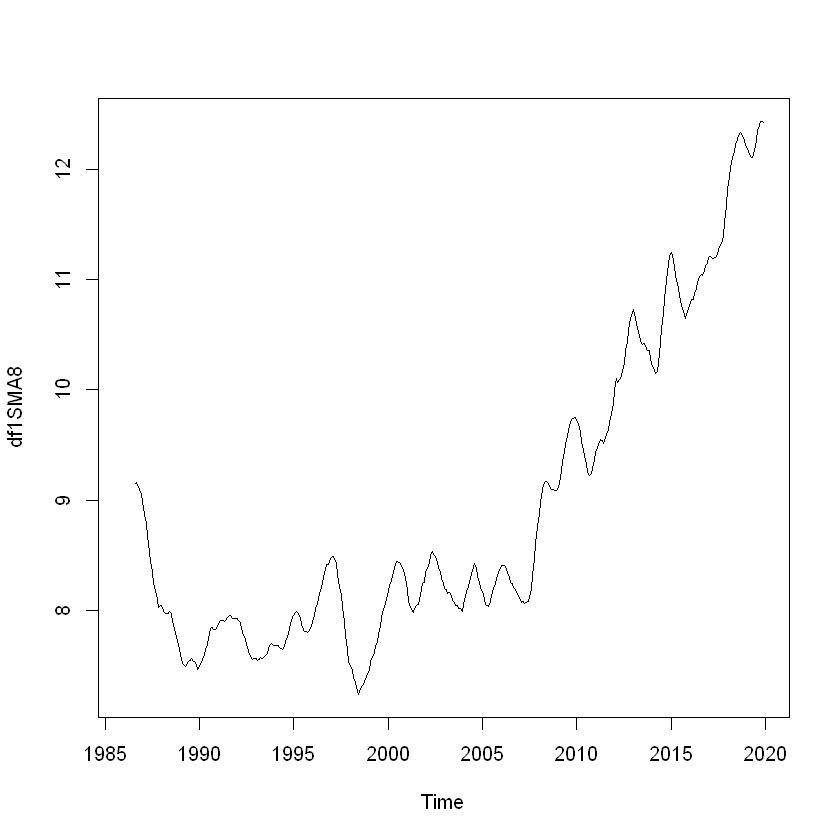

In [17]:
df1SMA8 <- SMA(df1, n=8) # smoothing with moving average 8
plot.ts(df1SMA8)

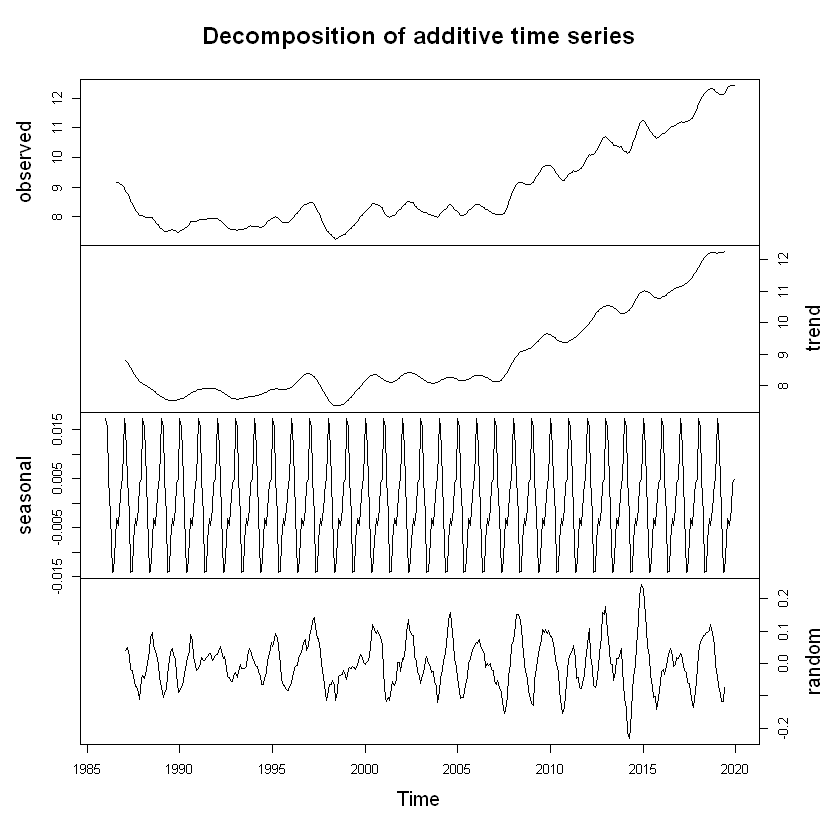

In [18]:
df1Comp <- decompose(df1SMA8) # decomposing
plot(df1Comp, yax.flip=TRUE)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom).

We see that the estimated trend component shows a small decrease from about 9 in 1997 to about 7 in 1999, followed by a steady increase from then on to about 12 in 2019.

### Seasonally Adjusting

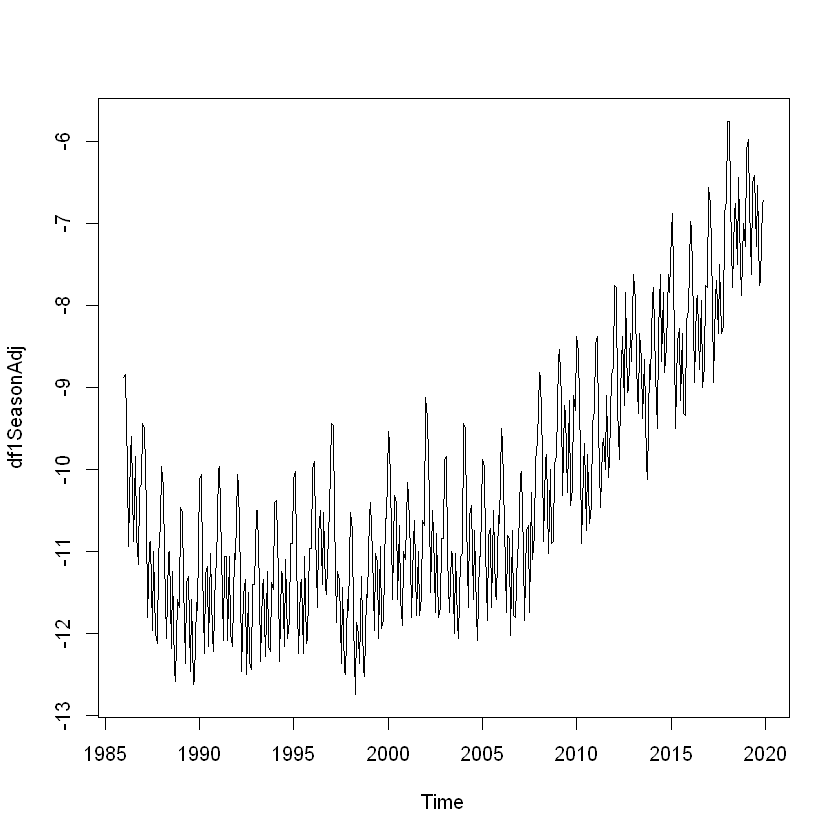

In [20]:
df1.Comp.seasonal <- sapply(df1Comp$seasonal, nchar)
df1SeasonAdj <- df1 - df1.Comp.seasonal
plot.ts(df1SeasonAdj)

### train test split

In [20]:
library('TSstudio')

Warning message:
"package 'TSstudio' was built under R version 3.6.2"

In [21]:
split_df1 <- ts_split(ts.obj = df1, sample.out = 12)

training <- split_df1$train
testing <- split_df1$test

length(df1)

length(training)
length(testing)

[1] 408

[1] 396

[1] 12

In [25]:
library(ggplot2)
library(ggfortify)

In [23]:
# keep parameters fixed; trace optimizer
train <- StructTS(training, type = c("BSM"),
                      fixed = c(0.1, 0.001, NA, NA), 
                                optim.control = list(trace=TRUE))
train

final  value -0.924496 
converged



Call:
StructTS(x = training, type = c("BSM"), fixed = c(0.1, 0.001, NA, NA), optim.control = list(trace = TRUE))

Variances:
  level    slope     seas  epsilon  
  0.100    0.001    0.000    0.000  

In [28]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fitted.fracdiff        fracdiff 
  fortify.ts             ggfortify
  residuals.ar           ggfortify
  residuals.fracdiff     fracdiff 

Attaching package: 'forecast'

The following object is masked from 'package:aTSA':

    forecast



For a multivariate timeseries, specify a seriesname for each timeseries. Defaulting to column names.


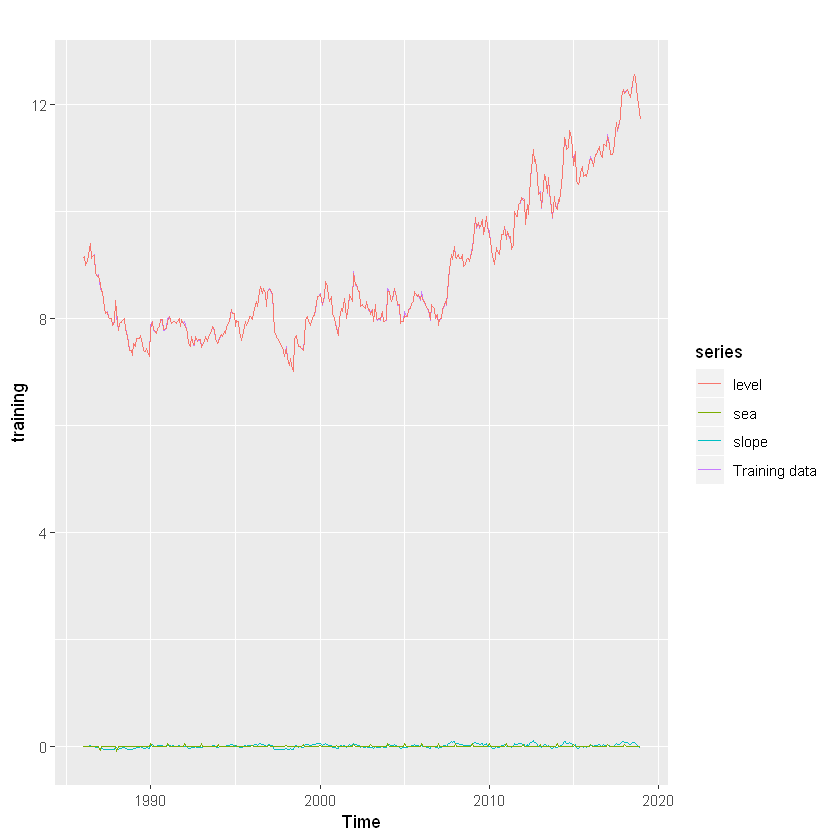

In [33]:
autoplot(training, series = 'Training data') +
autolayer(fitted(train, h=12),
series = '12 step fitted values')

In [34]:
modelCV <- CVar(training, k=5, lambda = 0.5)
print(modelCV)

Series: training 
Call:   CVar(y = training, k = 5, lambda = 0.5)

5-fold cross-validation
                   Mean          SD
ME        -0.0001652652 0.021484037
RMSE       0.1821226594 0.009918425
MAE        0.1354931756 0.007872120
MPE       -0.0090786278 0.242645033
MAPE       1.5236843323 0.090078722
ACF1       0.0194575105 0.135199729
Theil's U  1.0807699014 0.117821689

p-value of Ljung-Box test of residuals is  0.1778492 
if this value is significant (<0.05),
the result of the cross-validation should not be used
as the model is underfitting the data.


Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."

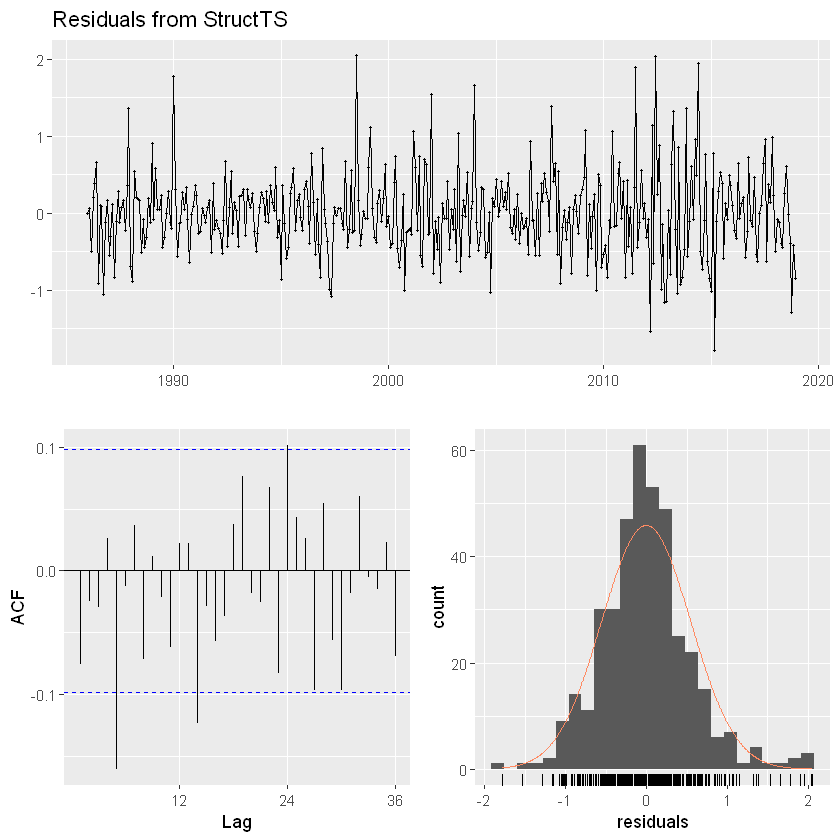

In [35]:
checkresiduals(train)

### Kalman filter

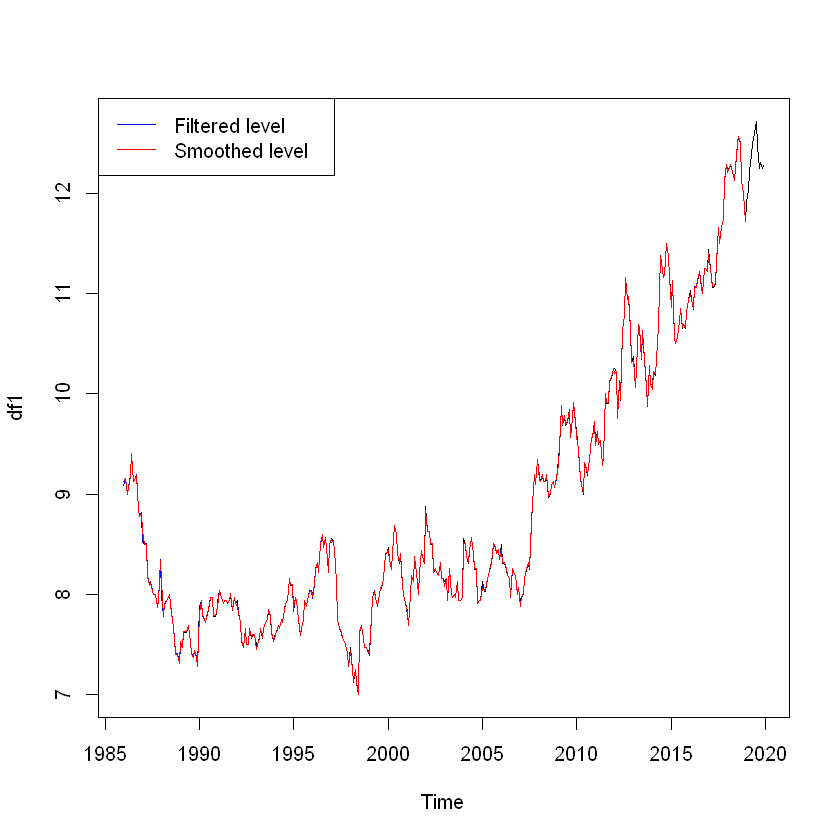

In [39]:
sm <- tsSmooth(train)
plot(df1)
lines(sm[,1],col='blue')
lines(fitted(train)[,1],col='red')

# Seasonally adjusted data
training.sa <- df1-sm[, 1]
lines(training.sa, col='black')
legend('topleft',col=c('blue','red', 'black'),lty=1, 
       legend=c('Filtered level','Smoothed level'))

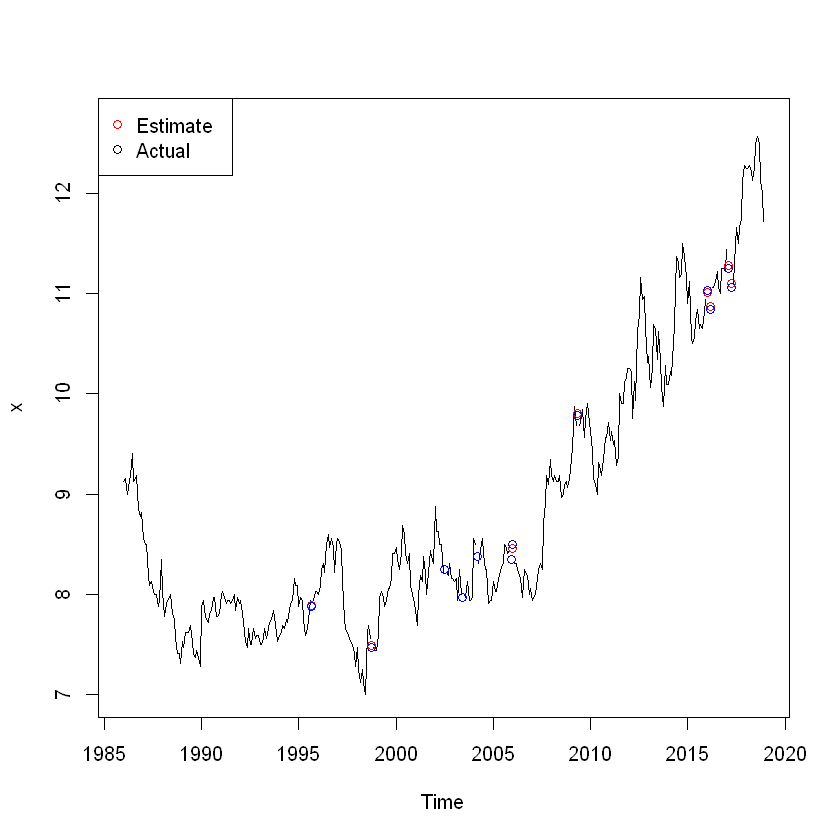

In [43]:
x <- training
miss <- sample(1:length(x), 12)
x[miss] <- NA
estim <- sm[,1]+sm[,2]
plot(x, ylim=range(df1))
points(time(x)[miss], estim[miss],
col='red', pch=1)
points(time(x)[miss], df1[miss],
col='blue', pch=1)
legend("topleft", pch=1, col=c(2,1),
 legend=c("Estimate","Actual"))

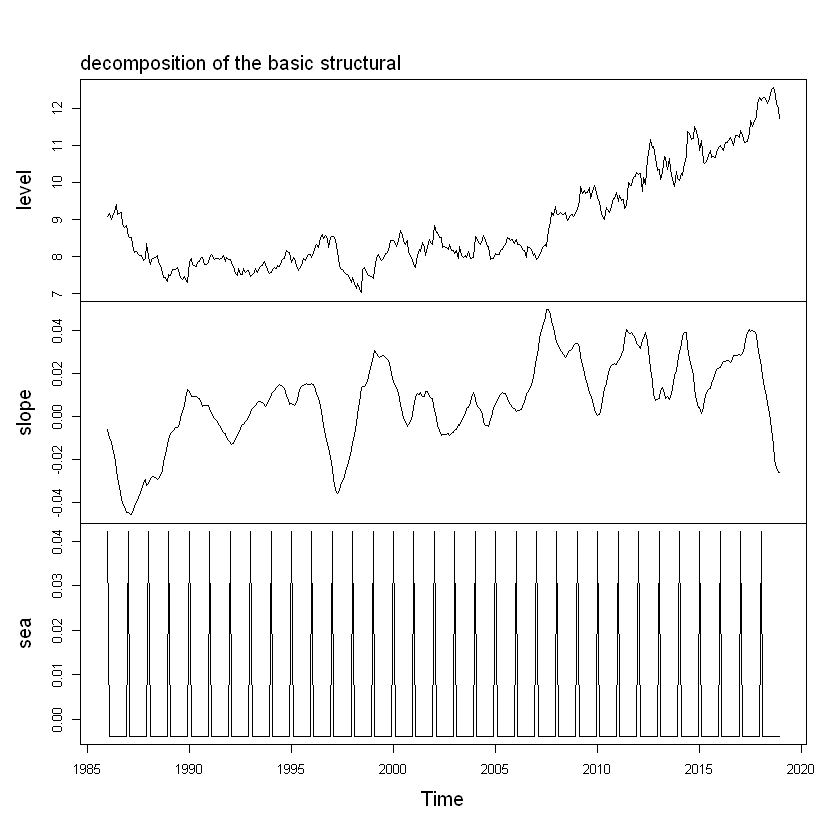

In [44]:
plot(sm, main = "")
mtext(text = "decomposition of the basic structural", 
      side = 3, adj = 0, line = 1)

## Prediction

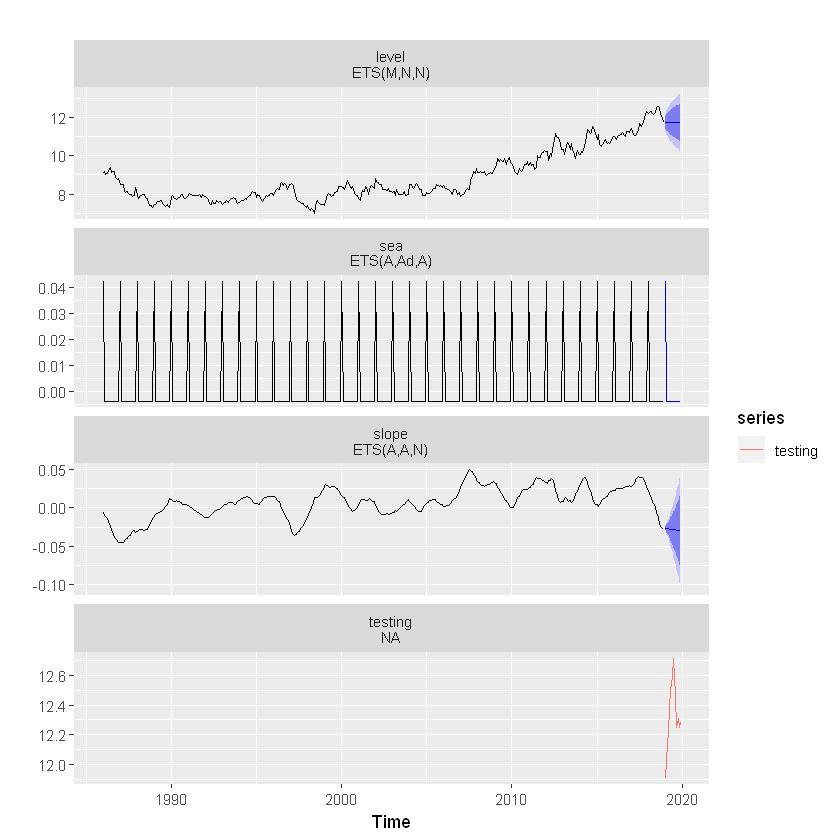

In [46]:
sm %>%
 forecast(h=12) %>%
 autoplot() + autolayer(testing)

## Dynamic linear models (dlm) with Kalman filter

In [48]:
install.packages('multcomp')
library(multcomp)

also installing the dependency 'TH.data'



package 'TH.data' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpiUry3s\downloaded_packages


Warning message:
"package 'multcomp' was built under R version 3.6.2"Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Warning message:
"package 'TH.data' was built under R version 3.6.2"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [63]:
# forecasting using dlm model

model <- function(p) {
    return(
      dlmModPoly(2, dV=p[1], dW=p[2:3]) +
      dlmModSeas(12, dV=p[4])
    )
}

# estimating parameters
mle <- dlmMLE(training, parm = c(0.1, 0.001, 1, 1), build = model)
if (mle$convergence == 0) print('converge') else print('did not converge')

[1] "converge"


In [64]:
str(model)

function (p)  
 - attr(*, "srcref")= 'srcref' int [1:8] 3 10 8 1 10 1 3 8
  ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x0000000054dd1c88> 


In [68]:
mle$par

[1] -4.578680e-01  1.564964e-02 -5.914296e-05  4.421320e-01

In [66]:
modelfit = model(mle$par) # fitting the dlm model

In [67]:
# applying kalman filter
modelfilter <- dlmFilter(training, modelfit)

In [69]:
# applying kalman smoother
modelsmoothed <- dlmSmooth(training, modelfit)

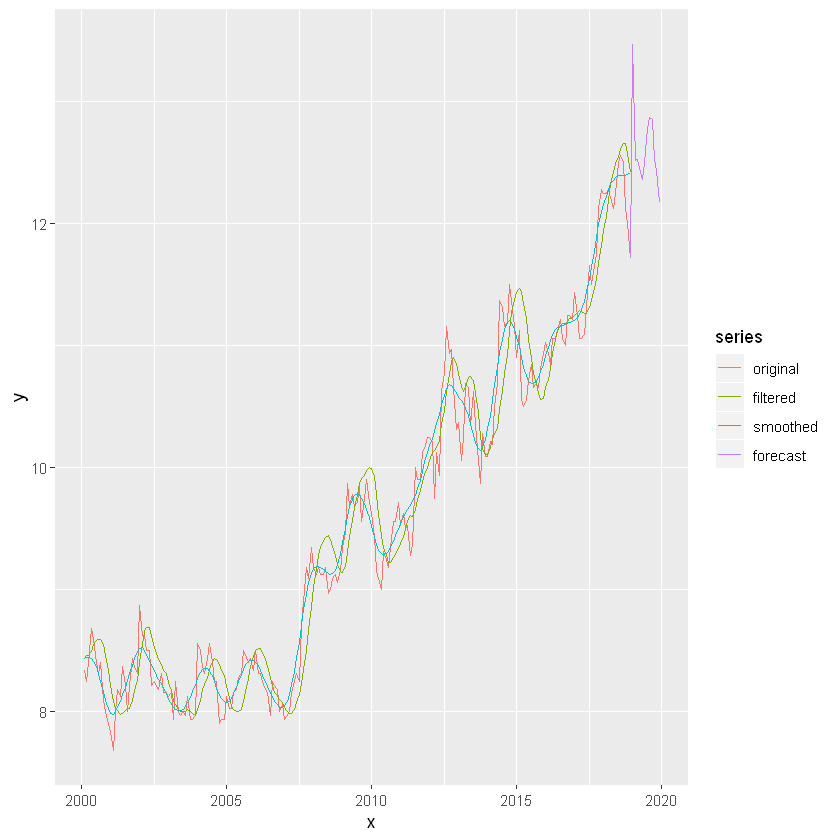

In [71]:
n <- 1*12
forecast <- dlmForecast(modelfilter, nAhead=n)
 
x <- index(training)
xf <- seq(max(x), max(x)+n/12, 1/12)
aa <- forecast$a[, -1] * (-1)
aa <- cbind(forecast$a[, 1], aa)
a <- drop(forecast$a%*%t(FF(modelfit)))
a <- c(tail(training, 1), a)
df <- rbind(
  data.frame(x=x, y=as.numeric(training), series="original"),
  data.frame(x=x, y=apply(modelfilter$m[-1, 1:2], 1, sum), series="filtered"),
  data.frame(x=x, y=apply(modelsmoothed$s[-1, 1:2], 1, sum), series="smoothed"),
  data.frame(x=xf, y=a, series="forecast")
)
dlm <- ggplot(subset(df, x>2000), aes(x=x, y=y, colour=series)) + geom_line()
dlm

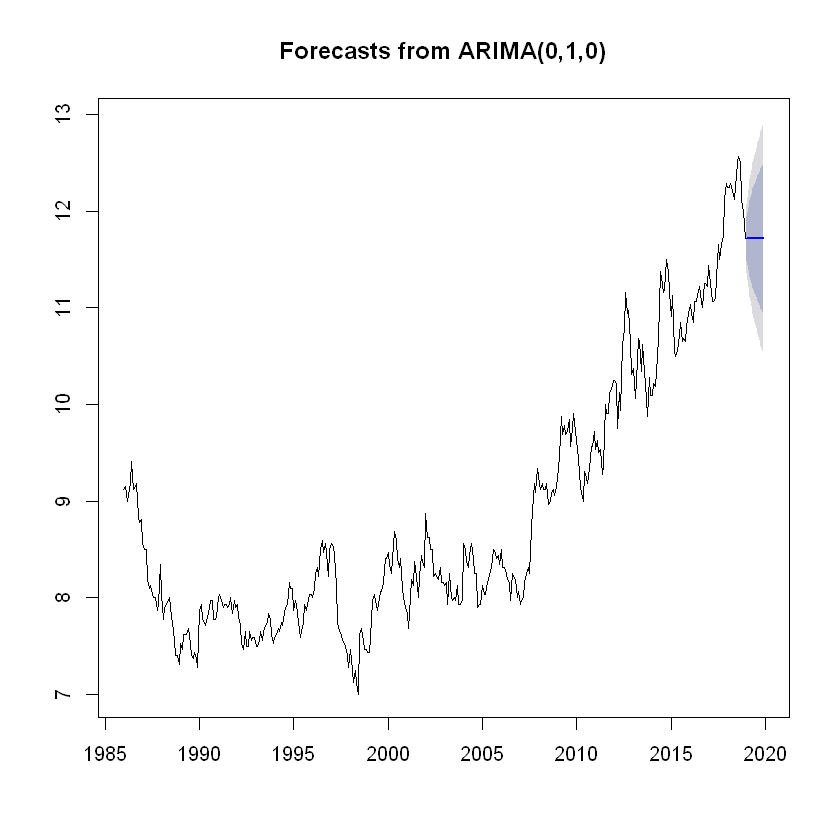

In [72]:
# forecasting using arima
arima <- auto.arima(training)
arima.forecast <- forecast(arima, h = 1*12)
plot(arima.forecast)